In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

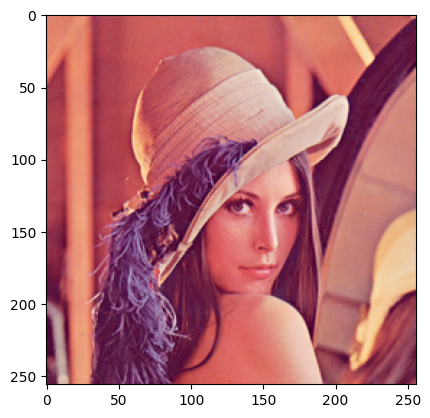

In [2]:
# 画像ファイルの読み込み
image = cv2.imread("samples/Lenna.bmp")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(image_rgb)

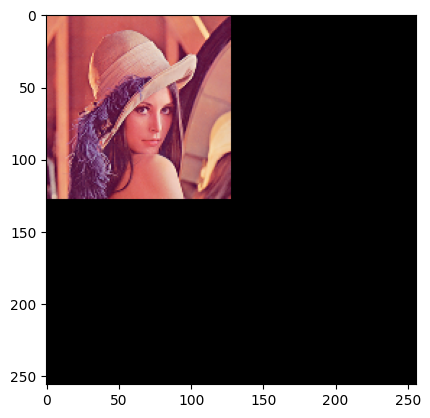

In [51]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 変換行列
A = np.array([[1/2, 0],
              [0, 1/2]])

# 幅，高さ，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x, y])
        (x2, y2) = np.dot(A, X)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)

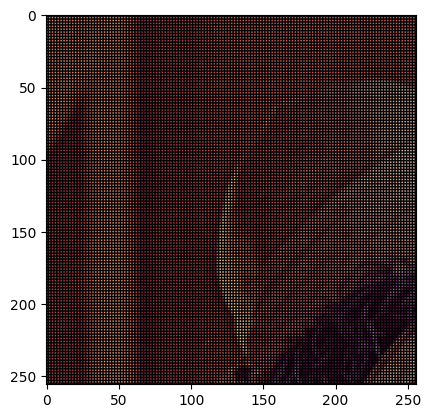

In [52]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 変換行列
A = np.array([[2, 0],
              [0, 2]])

# 幅，高さ，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x, y])
        (x2, y2) = np.dot(A, X)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)

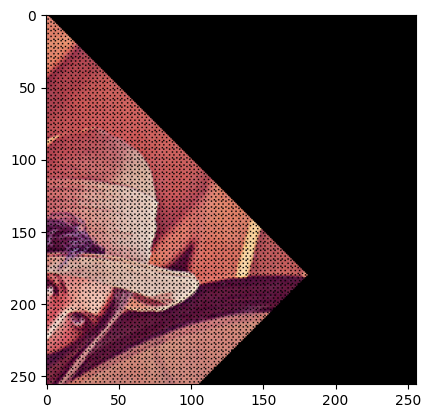

In [59]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 回転角度
theta = np.radians(45)

# 変換行列
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# 幅，高さ，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x, y])
        (x2, y2) = np.dot(A, X)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)
plt.savefig("rotate.png")

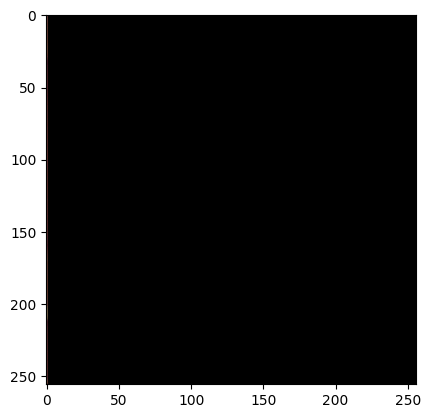

In [57]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 回転角度
theta = np.radians(90)

# 変換行列
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x, y])
        (x2, y2) = np.dot(A, X)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)
plt.savefig("rotate.png")

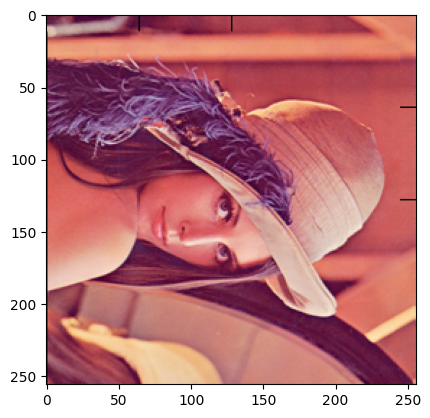

In [60]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 回転角度
theta = np.radians(90)

# 変換行列
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x-width/2, y-height/2])
        (x2, y2) = np.dot(A, X) + (width/2, height/2)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)
plt.savefig("rotate.png")

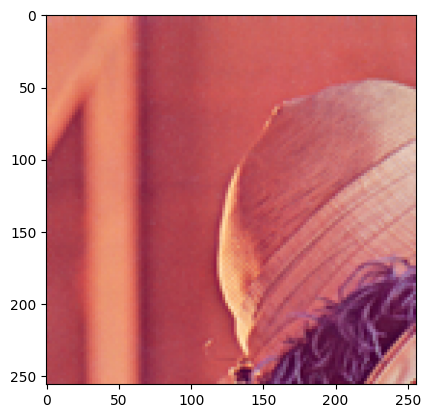

In [61]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 変換行列
A = np.array([[2, 0],
              [0, 2]])

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# 逆行列
A_inv = np.linalg.inv(A)

for y in range(height*2):
    for x in range(width*2):
        X = np.array([x, y])
        (x2, y2) = np.dot(A_inv, X)
        if 0 <= x < width and 0 <= y < height:
            output_image[y, x] = image_rgb[int(y2), int(x2)]

# 画像の表示
plt.imshow(output_image)
plt.savefig("scale.png")

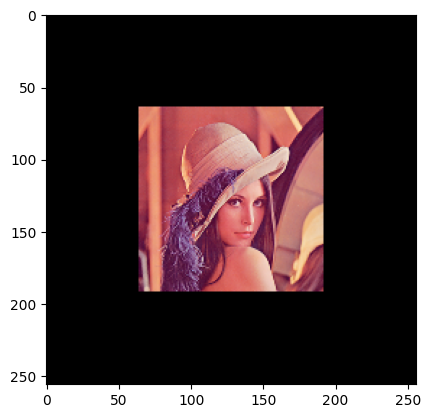

In [78]:
# 変換後の画像
output_image = np.zeros_like(image_rgb)

# 変換行列
A = np.array([[0.5, 0, 64],
              [0, 0.5, 64],
              [0, 0, 1]], dtype=np.float64)

# 幅，高さ，チャネル
height, width, channels = image_rgb.shape

for y in range(height):
    for x in range(width):
        X = np.array([x, y, 1])
        (x2, y2, _) = np.dot(A, X)
        if 0 <= x2 < width and 0 <= y2 < height:
            output_image[int(y2), int(x2)] = image_rgb[y, x]

# 画像の表示
plt.imshow(output_image)
plt.savefig("affine.png")

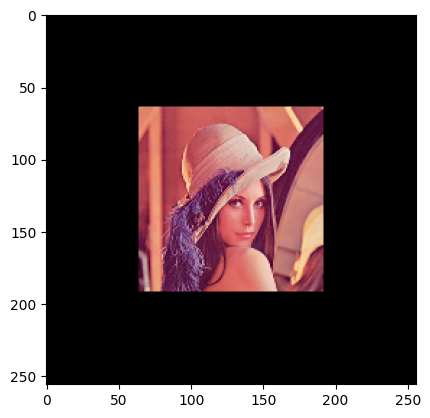

In [89]:
# 変換行列
A = np.array([[0.5, 0, 64],
              [0, 0.5, 64],
              [0, 0, 1]], dtype=np.float64)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# アフィン変換
output_image = cv2.warpPerspective(image_rgb, A, (width, height))

# 画像の表示
plt.imshow(output_image)
plt.savefig("affine.png")

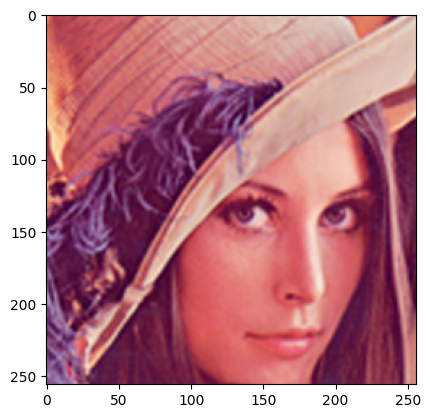

In [88]:
# 変換行列
A = np.array([[2.0, 0, -128],
              [0, 2.0, -128],
              [0, 0, 1]], dtype=np.float64)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# アフィン変換
output_image = cv2.warpPerspective(image_rgb, A, (width, height), flags=cv2.INTER_CUBIC)

# 画像の表示
plt.imshow(output_image)
plt.savefig("affine.png")

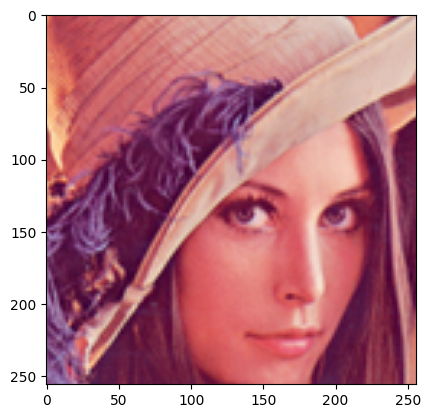

In [86]:
# 変換行列
A = np.array([[2.0, 0, -128],
              [0, 2.0, -128],
              [0, 0, 1]], dtype=np.float64)

# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

# アフィン変換
output_image = cv2.warpPerspective(image_rgb, A, (width, height), cv2.INTER_LINEAR)

# 画像の表示
plt.imshow(output_image)
plt.savefig("affine.png")

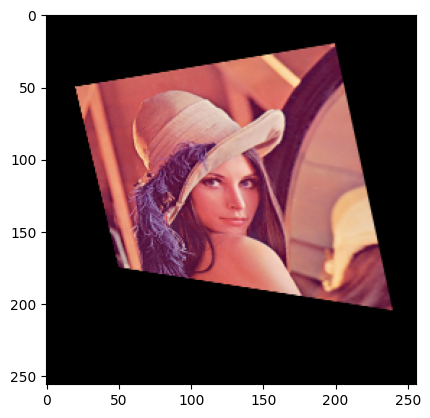

In [90]:
# 高さ，幅，チャネル
height, width, channels = image_rgb.shape

src_pts = np.array([[0, 0], [0, height], [width, height], [width, 0]], dtype=np.float32)
dst_pts = np.array([[20, 50], [50, 175], [240, 205], [200, 20]], dtype=np.float32)

A = cv2.getPerspectiveTransform(src_pts, dst_pts)

# アフィン変換
output_image = cv2.warpPerspective(image_rgb, A, (width, height))

# 画像の表示
plt.imshow(output_image)
plt.savefig("affine.png")